In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [194]:
df = pd.read_csv('../Data/Sunspots.csv', index_col='Date', parse_dates=True)

In [195]:
df = df.drop(columns=['Unnamed: 0'])

In [196]:
df.rename(columns={'Monthly Mean Total Sunspot Number': 'Sunspots'}, inplace=True)

In [197]:
df.columns

Index(['Sunspots'], dtype='object')

In [198]:
df

,Sunspots
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0


In [199]:
df['year'] = df.index.year
df['month'] = df.index.month

In [200]:
df

,Sunspots,year,month
Date,,,
1749-01-31,96.7,1749,1
1749-02-28,104.3,1749,2
1749-03-31,116.7,1749,3
1749-04-30,92.8,1749,4
1749-05-31,141.7,1749,5
...,...,...,...
2020-09-30,0.6,2020,9
2020-10-31,14.4,2020,10
2020-11-30,34.0,2020,11


In [201]:
for i in range(1, 13):
    df[f'lag_{i}'] = df['Sunspots'].shift(i)

In [202]:
df['rolling_mean_12'] = df['Sunspots'].shift(1).rolling(window=12).mean()

In [203]:
df.dropna(inplace=True)

In [204]:
df.isna().sum()

Sunspots           0
year               0
month              0
lag_1              0
lag_2              0
lag_3              0
lag_4              0
lag_5              0
lag_6              0
lag_7              0
lag_8              0
lag_9              0
lag_10             0
lag_11             0
lag_12             0
rolling_mean_12    0
dtype: int64

In [205]:
#split data
features = ['year', 'month', 'rolling_mean_12'] + [f'lag_{i}' for i in range(1, 13)]
X = df.drop('Sunspots', axis=1)
y = df['Sunspots']

In [206]:
X

,year,month,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,rolling_mean_12
Date,,,,,,,,,,,,,,,
1750-01-31,1750,1,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,104.3,96.7,134.875000
1750-02-28,1750,2,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,104.3,137.000000
1750-03-31,1750,3,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,138.850000
1750-04-30,1750,4,148.7,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,141.516667
1750-05-31,1750,5,147.2,148.7,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,146.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30,2020,9,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,1.1,3.016667
2020-10-31,2020,10,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,2.975000
2020-11-30,2020,11,14.4,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,4.141667


In [207]:
# > 2000
split_date = '2001-01-01'
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

In [208]:
y_train

Date
1750-01-31    122.2
1750-02-28    126.5
1750-03-31    148.7
1750-04-30    147.2
1750-05-31    150.0
              ...  
2000-08-31    180.5
2000-09-30    156.0
2000-10-31    141.6
2000-11-30    158.1
2000-12-31    143.3
Name: Sunspots, Length: 3012, dtype: float64

In [209]:
X_test

,year,month,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,rolling_mean_12
Date,,,,,,,,,,,,,,,
2001-01-31,2001,1,143.3,158.1,141.6,156.0,180.5,244.3,188.0,165.9,191.5,217.7,165.7,133.1,173.808333
2001-02-28,2001,2,142.6,143.3,158.1,141.6,156.0,180.5,244.3,188.0,165.9,191.5,217.7,165.7,174.600000
2001-03-31,2001,3,121.5,142.6,143.3,158.1,141.6,156.0,180.5,244.3,188.0,165.9,191.5,217.7,170.916667
2001-04-30,2001,4,165.8,121.5,142.6,143.3,158.1,141.6,156.0,180.5,244.3,188.0,165.9,191.5,166.591667
2001-05-31,2001,5,161.7,165.8,121.5,142.6,143.3,158.1,141.6,156.0,180.5,244.3,188.0,165.9,164.108333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30,2020,9,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,1.1,3.016667
2020-10-31,2020,10,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,2.975000
2020-11-30,2020,11,14.4,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,4.141667


In [210]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=500,     # Jumlah pohon keputusan
    learning_rate=0.05,   # Seberapa cepat model belajar
    max_depth=5,          # Kedalaman maksimum setiap pohon
    random_state=42,
    loss='squared_error'
)
# epoch ->

In [211]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500,
                          random_state=42)

In [212]:
predictios = gbr.predict(X_test)

In [213]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [214]:
mae = mean_absolute_error(y_test, predictios)
mse = mean_squared_error(y_test, predictios)

In [215]:
print(mae)
print(mse)

17.877758974509003
480.50117155463937


In [216]:
from sklearn.metrics import r2_score

In [217]:
print(r2_score(y_test, predictios))

0.829249188561103


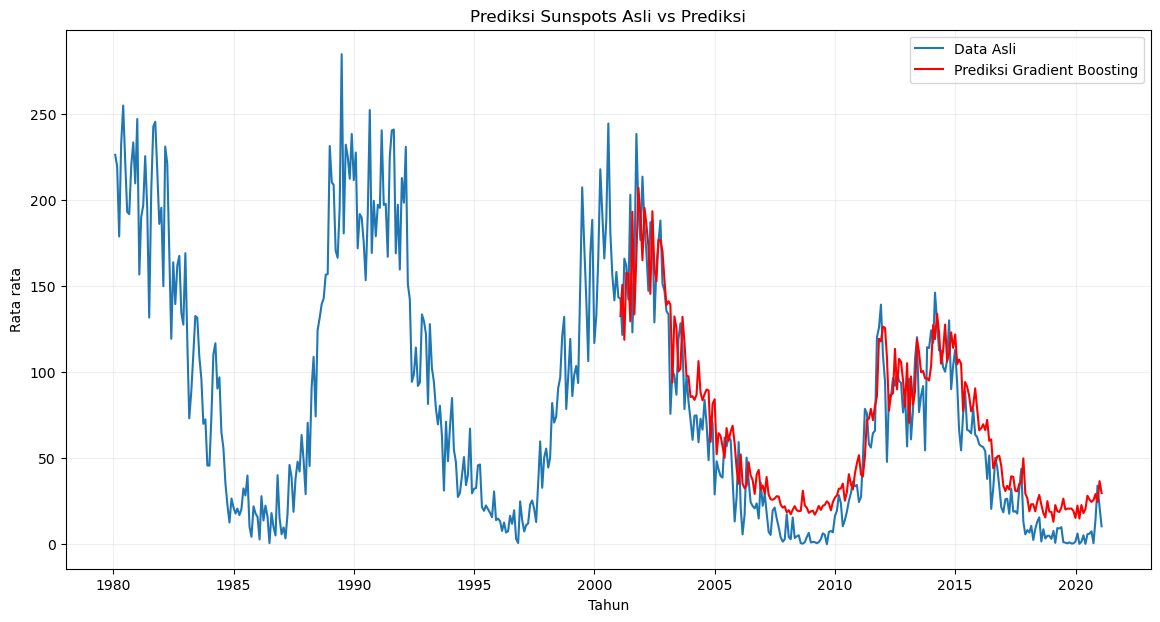

In [218]:
results = pd.DataFrame({'Asli': y_test, 'Prediksi':predictios}, index=y_test.index)

plt.figure(figsize=(14, 7))
plt.plot(df['Sunspots']['1980':], label='Data Asli')
plt.plot(results['Prediksi'], label='Prediksi Gradient Boosting', color='red')
plt.title('Prediksi Sunspots Asli vs Prediksi')
plt.xlabel('Tahun')
plt.ylabel('Rata rata')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

In [219]:
last_data = df.iloc[-1]
future_forecasts = []
current_features = last_data[features].values.reshape(1, -1)
last_known_sunspot = last_data['Sunspots']
history = list(df['Sunspots'].values)

In [220]:
n_forecast = 60
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(month=1), periods=n_forecast, freq='M')

for i in range(n_forecast):
    next_pred = gbr.predict(current_features)[0]
    future_forecasts.append(next_pred)

    history.append(next_pred)
    next_date = forecast_index[i]
    new_lags = history[-12:]
    new_lags.reverse()

    new_rolling_mean = np.mean(history[-13:-1])

    current_features = np.array([[next_date.year,  next_date.month, new_rolling_mean] + new_lags]).reshape(1, -1)

forecast_df = pd.Series(future_forecasts, index=forecast_index)


/var/folders/p3/0mc5zsd91bdcw4p37s0rxmf80000gn/T/ipykernel_17927/2816961268.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(month=1), periods=n_forecast, freq='M')
/opt/homebrew/Caskroom/miniconda/base/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.

In [221]:
forecast_df

2021-01-31     24.471879
2021-02-28     25.029674
2021-03-31     33.687118
2021-04-30     34.830613
2021-05-31     33.683165
2021-06-30     49.120819
2021-07-31     49.877940
2021-08-31     48.773670
2021-09-30     47.276664
2021-10-31     61.214516
2021-11-30     56.034481
2021-12-31     60.787846
2022-01-31     53.412246
2022-02-28     66.329908
2022-03-31     62.600603
2022-04-30     62.124315
2022-05-31     63.376980
2022-06-30     69.634098
2022-07-31     74.414562
2022-08-31     74.577464
2022-09-30     79.424896
2022-10-31     80.782050
2022-11-30     82.501106
2022-12-31     82.662928
2023-01-31     84.693782
2023-02-28     93.965933
2023-03-31     92.331271
2023-04-30     90.265343
2023-05-31     84.943438
2023-06-30     88.353081
2023-07-31    100.839841
2023-08-31     88.244842
2023-09-30     92.965918
2023-10-31     90.309688
2023-11-30     94.727164
2023-12-31    101.860756
2024-01-31     95.484185
2024-02-29    103.386502
2024-03-31     97.908631
2024-04-30    112.266893


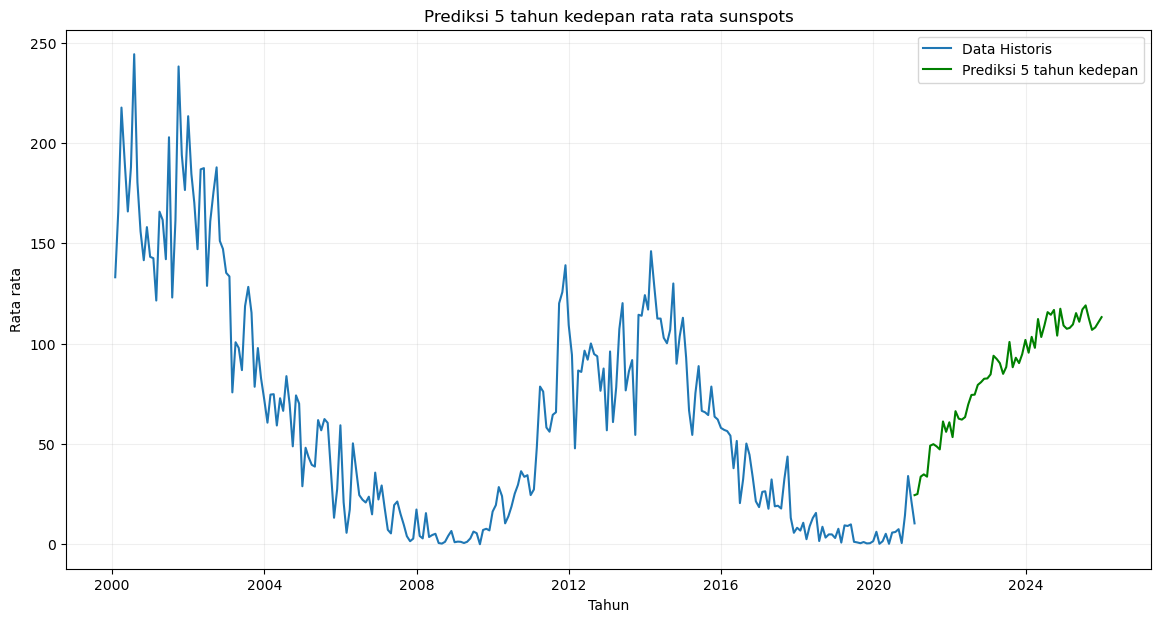

In [222]:
plt.figure(figsize=(14, 7))
plt.plot(df['Sunspots']['2000':], label='Data Historis')
plt.plot(forecast_df, label='Prediksi 5 tahun kedepan', color='green')
plt.title('Prediksi 5 tahun kedepan rata rata sunspots')
plt.xlabel('Tahun')
plt.ylabel('Rata rata')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [224]:
df = pd.read_csv('../Data/Sunspots.csv', index_col='Date', parse_dates=True)

In [225]:
df = df.drop(columns=["Unnamed: 0"])

In [226]:
df.rename(columns={'Monthly Mean Total Sunspot Number': 'Sunspots'}, inplace=True)

In [227]:
df.columns

Index(['Sunspots'], dtype='object')

In [228]:
df

,Sunspots
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0


In [229]:
df['year'] = df.index.year
df['month'] = df.index.month

In [230]:
df

,Sunspots,year,month
Date,,,
1749-01-31,96.7,1749,1
1749-02-28,104.3,1749,2
1749-03-31,116.7,1749,3
1749-04-30,92.8,1749,4
1749-05-31,141.7,1749,5
...,...,...,...
2020-09-30,0.6,2020,9
2020-10-31,14.4,2020,10
2020-11-30,34.0,2020,11


In [231]:
## Lag
for i in range(1, 13):
    df[f'lag_{i}'] = df['Sunspots'].shift(i)

In [232]:
# 3. Fitur Rolling Window (rata-rata bergerak)
df['rolling_mean_12'] = df['Sunspots'].shift(1).rolling(window=12).mean()

In [233]:
df

,Sunspots,year,month,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,rolling_mean_12
Date,,,,,,,,,,,,,,,,
1749-01-31,96.7,1749,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749-02-28,104.3,1749,2,96.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749-03-31,116.7,1749,3,104.3,96.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749-04-30,92.8,1749,4,116.7,104.3,96.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749-05-31,141.7,1749,5,92.8,116.7,104.3,96.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30,0.6,2020,9,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,1.1,3.016667
2020-10-31,14.4,2020,10,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,2.975000
2020-11-30,34.0,2020,11,14.4,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,4.141667


In [234]:
df.dropna(inplace=True)

In [235]:
df

,Sunspots,year,month,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,rolling_mean_12
Date,,,,,,,,,,,,,,,,
1750-01-31,122.2,1750,1,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,104.3,96.7,134.875000
1750-02-28,126.5,1750,2,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,104.3,137.000000
1750-03-31,148.7,1750,3,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,138.850000
1750-04-30,147.2,1750,4,148.7,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,141.516667
1750-05-31,150.0,1750,5,147.2,148.7,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,146.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30,0.6,2020,9,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,1.1,3.016667
2020-10-31,14.4,2020,10,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,2.975000
2020-11-30,34.0,2020,11,14.4,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,4.141667


In [236]:
print("Data setelah rekayasa fitur (5 baris pertama):")
df.head()

Data setelah rekayasa fitur (5 baris pertama):


,Sunspots,year,month,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,rolling_mean_12
Date,,,,,,,,,,,,,,,,
1750-01-31,122.2,1750,1,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,104.3,96.7,134.875000
1750-02-28,126.5,1750,2,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,104.3,137.000000
1750-03-31,148.7,1750,3,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,138.850000
1750-04-30,147.2,1750,4,148.7,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,141.516667
1750-05-31,150.0,1750,5,147.2,148.7,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,146.050000


In [237]:
# --- Langkah 3: Memisahkan Fitur (X) dan Target (y) ---
# X adalah semua kolom fitur yang kita buat
features = ['year', 'month', 'rolling_mean_12'] + [f'lag_{i}' for i in range(1, 13)]
X = df.drop(columns=['Sunspots'], axis=1) #bisa juga X = df[features]

# y adalah nilai yang ingin kita prediksi
y = df['Sunspots']

In [238]:
X

,year,month,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,rolling_mean_12
Date,,,,,,,,,,,,,,,
1750-01-31,1750,1,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,104.3,96.7,134.875000
1750-02-28,1750,2,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,104.3,137.000000
1750-03-31,1750,3,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,116.7,138.850000
1750-04-30,1750,4,148.7,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,92.8,141.516667
1750-05-31,1750,5,147.2,148.7,126.5,122.2,142.0,264.3,125.8,126.5,110.5,158.0,139.2,141.7,146.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30,2020,9,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,1.1,3.016667
2020-10-31,2020,10,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,0.4,2.975000
2020-11-30,2020,11,14.4,0.6,7.5,6.1,5.8,0.2,5.2,1.5,0.2,6.2,1.5,0.5,4.141667


In [239]:
y

Date
1750-01-31    122.2
1750-02-28    126.5
1750-03-31    148.7
1750-04-30    147.2
1750-05-31    150.0
              ...  
2020-09-30      0.6
2020-10-31     14.4
2020-11-30     34.0
2020-12-31     21.8
2021-01-31     10.4
Name: Sunspots, Length: 3253, dtype: float64

In [240]:
# --- Langkah 4: Membagi Data menjadi Training dan Testing ---
# PENTING: Untuk time series, data tidak boleh diacak.
# Kita akan membagi berdasarkan waktu.
split_date = '2001-01-01'
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

In [241]:
len(X_train)

3012

In [242]:
len(X_test)

241

In [243]:
gbr = GradientBoostingRegressor(
    n_estimators=500,     # Jumlah pohon keputusan
    learning_rate=0.05,   # Seberapa cepat model belajar
    max_depth=5,          # Kedalaman maksimum setiap pohon
    random_state=42,
    loss='squared_error'
)

In [244]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500,
                          random_state=42)

In [245]:
prediction = gbr.predict(X_test)

In [246]:
mse = mean_squared_error(y_test, prediction)
print(f"Mean Squared Error pada data test: {mse:.2f}")

Mean Squared Error pada data test: 480.50


In [247]:
from sklearn.metrics import r2_score

In [248]:
r2 = r2_score(y_test, prediction)

In [249]:
r2

0.829249188561103

In [250]:
results = pd.DataFrame({'Asli': y_test, 'Prediksi': prediction}, index=y_test.index)

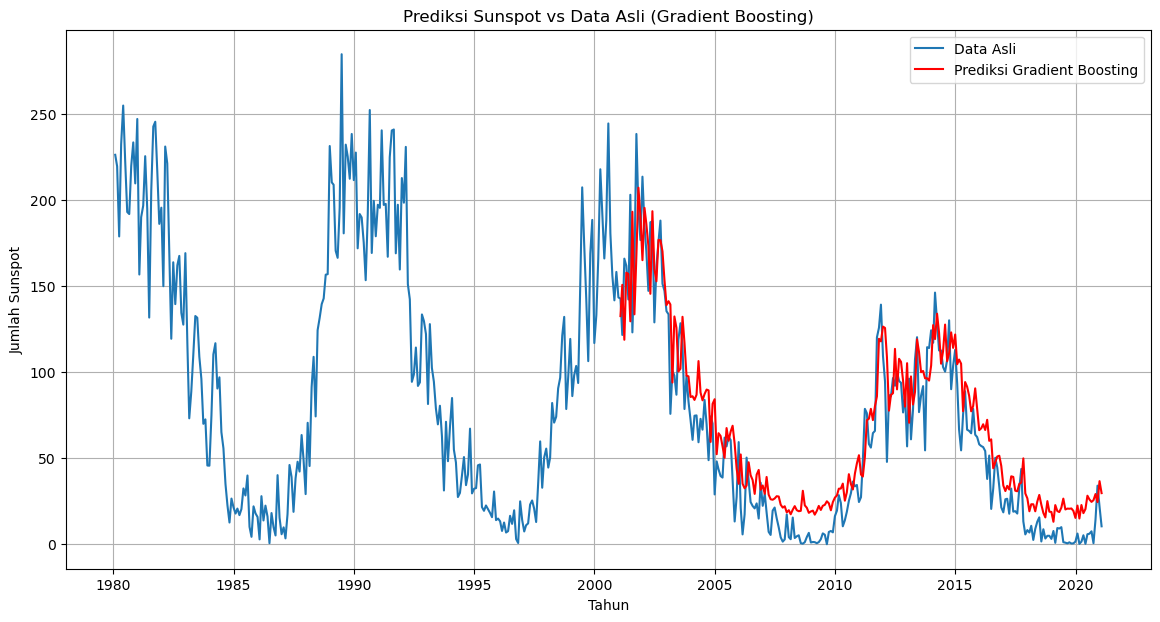

In [251]:
plt.figure(figsize=(14, 7))
plt.plot(df['Sunspots']['1980':], label='Data Asli')
plt.plot(results['Prediksi'], label='Prediksi Gradient Boosting', color='red')
plt.title('Prediksi Sunspot vs Data Asli (Gradient Boosting)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Sunspot')
plt.legend()
plt.grid(True)
plt.show()

In [252]:
print("Melakukan forecast untuk masa depan...")

# Ambil data terakhir dari dataset sebagai titik awal
last_data = df.iloc[-1]
future_forecasts = []
current_features = last_data[features].values.reshape(1, -1)
last_known_sunspot = last_data['Sunspots']
history = list(df['Sunspots'].values)

Melakukan forecast untuk masa depan...


In [253]:
n_forecast = 60
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')

for i in range(n_forecast):
    # Prediksi 1 langkah ke depan
    next_pred = gbr.predict(current_features)[0]
    future_forecasts.append(next_pred)

    # Update history dengan nilai prediksi baru
    history.append(next_pred)

    # Siapkan fitur untuk langkah berikutnya
    # 1. Dapatkan tanggal baru
    next_date = forecast_index[i]

    # 2. Buat fitur lag dari history yang sudah diupdate
    new_lags = history[-12:] # Ambil 12 nilai terakhir
    new_lags.reverse()

    # 3. Buat fitur rolling mean
    new_rolling_mean = np.mean(history[-13:-1]) # Rata-rata 12 bulan sebelum prediksi

    # 4. Gabungkan semua fitur baru
    current_features = np.array([[next_date.year,  h, new_rolling_mean] + new_lags]).reshape(1, -1)

forecast_df = pd.Series(future_forecasts, index=forecast_index)


/var/folders/p3/0mc5zsd91bdcw4p37s0rxmf80000gn/T/ipykernel_17927/997903002.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')
/opt/homebrew/Caskroom/miniconda/base/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


NameError: name 'h' is not defined

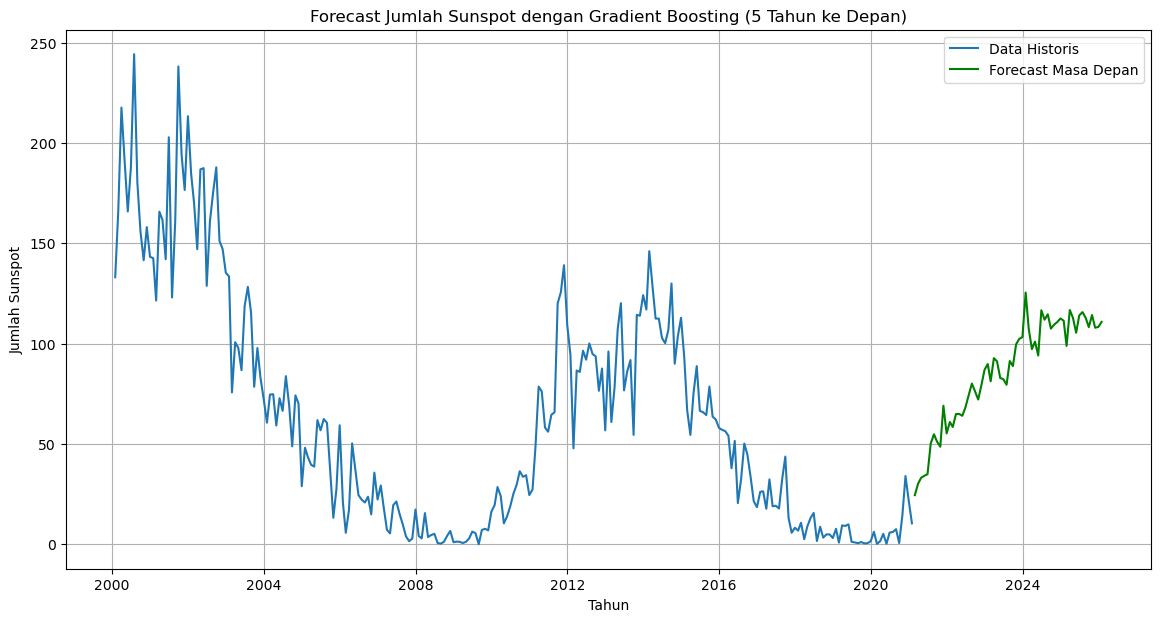

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Sunspots']['2000':], label='Data Historis')
plt.plot(forecast_df, label='Forecast Masa Depan', color='green')
plt.title('Forecast Jumlah Sunspot dengan Gradient Boosting (5 Tahun ke Depan)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Sunspot')
plt.legend()
plt.grid(True)
plt.show()